# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import json
import requests
import random
import pandas as pd
import numpy as np
import time
from citipy import citipy
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# make variables for latitude and longitude  

lat = {'min': -90, 'max': 90}
long = {'min': -180, 'max': 180}

# Create arrays containing increments of lat and long.
lat_array = np.arange(lat['min'], lat['max'], 0.01)
long_array = np.arange(long['min'], long['max'], 0.01)

In [3]:

# data frame for city and weather data
column_title = ('city_name', 'country_code', 'Latitude', 'Longitude','Temp (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')
WeatherPy_df = pd.DataFrame(columns = column_title)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Set the sample size.
sample_size = 500
target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
#set variable for api key 
api_key = "06380c949aec90a798561052e0fbd015"
units = 'imperial'

record = 0

# Loop through and grab the Temp, Humidity, Cloudiness and Wind Speed using OpenWeatherMapAPI
    
while len(WeatherPy_df) < sample_size:
    # choose a random point within the domain 
    rand_lat = random.choice(lat_array)
    rand_long = random.choice(long_array)
    # Call citipy's nearest_city() method to get a city object.
    city = citipy.nearest_city(rand_lat, rand_long)
    city_name = city.city_name
    country_code = city.country_code
    # Call Open Weather Map API to obtain data and append it to df
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    weather_response = requests.get(url)
    file = weather_response.json()
    if file["cod"] == 200:
        print('City: %s. %s' % (file['name'], url))
        latitude = file["coord"]["lat"]
        longitude = file["coord"]["lon"]
        temp = file["main"]["temp"]
        humidity = file["main"]["humidity"]
        cloud = file["clouds"]["all"]
        wind = file["wind"]["speed"]
        
        

        record += 1
        
        # Wait between 1-4 seconds before next loop
        time.sleep(random.randint(1, 4))
        
else:
    pass
    
print("Here are your results")



# save the data frame to a csv file 
WeatherPy_df.to_csv("weatherpy_data.csv")

City: Chuy. http://api.openweathermap.org/data/2.5/weather?q=chuy,uy&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Mar del Plata. http://api.openweathermap.org/data/2.5/weather?q=mar del plata,ar&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Sao Filipe. http://api.openweathermap.org/data/2.5/weather?q=sao filipe,cv&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Atuona. http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Pisco. http://api.openweathermap.org/data/2.5/weather?q=pisco,pe&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Constitucion. http://api.openweathermap.org/data/2.5/weather?q=constitucion,mx&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Victoria. http://api.openweathermap.org/data/2.5/weather?q=victoria,sc&unit

City: Vao. http://api.openweathermap.org/data/2.5/weather?q=vao,nc&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Hithadhoo. http://api.openweathermap.org/data/2.5/weather?q=hithadhoo,mv&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Saldanha. http://api.openweathermap.org/data/2.5/weather?q=saldanha,za&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Sosnovo-Ozerskoye. http://api.openweathermap.org/data/2.5/weather?q=sosnovo-ozerskoye,ru&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Hobart. http://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Nanortalik. http://api.openweathermap.org/data/2.5/weather?q=nanortalik,gl&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Vestmannaeyjar. http://api.openweathermap.org/data/2.5/weather?q=vestma

City: Oranjemund. http://api.openweathermap.org/data/2.5/weather?q=oranjemund,na&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Lavrentiya. http://api.openweathermap.org/data/2.5/weather?q=lavrentiya,ru&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Villablino. http://api.openweathermap.org/data/2.5/weather?q=villablino,es&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Inverness. http://api.openweathermap.org/data/2.5/weather?q=inverness,ca&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Nam Som. http://api.openweathermap.org/data/2.5/weather?q=nam som,th&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Nikolskoye. http://api.openweathermap.org/data/2.5/weather?q=niko

City: Buala. http://api.openweathermap.org/data/2.5/weather?q=buala,sb&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Atuona. http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Marawi. http://api.openweathermap.org/data/2.5/weather?q=marawi,sd&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Kununurra. http://api.openweathermap.org/data/2.5/weather?q=kununurra,au&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Anyang. http://api.openweathermap.org/data/2.5/weather?q=anyang,cn&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Georgetown. http://api.openweathermap.org/data/2.5/weather?q=georgetown,sh&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Narsaq. http://api.openweathermap.org/data/2.5/weather?q=narsaq,gl&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Angra dos Reis. http://api.openweathermap.org/data/2.5/weather?q=angra dos reis,br&units=impe

City: Marawi. http://api.openweathermap.org/data/2.5/weather?q=marawi,sd&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Jamestown. http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Port Elizabeth. http://api.openweathermap.org/data/2.5/weather?q=port elizabeth,za&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Cap Malheureux. http://api.openweathermap.org/data/2.5/weather?q=cap malheureux,mu&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Sao Filipe. http://api.openweathermap.org/data/2.5/weather?q=sao filipe,cv&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Te Anau. http://api.openweathermap.org/data/2.5/weather?q=te anau,nz&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Dikson. http://api.openweathermap.org/data/2.5/weather?q=dikson,ru&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Bluff. http://api.openweathermap.org/data/2.5/weather?q=b

City: Hasaki. http://api.openweathermap.org/data/2.5/weather?q=hasaki,jp&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Visby. http://api.openweathermap.org/data/2.5/weather?q=visby,se&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Georgetown. http://api.openweathermap.org/data/2.5/weather?q=georgetown,sh&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Buique. http://api.openweathermap.org/data/2.5/weather?q=buique,br&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Timmins. http://api.openweathermap.org/data/2.5/weather?q=timmins,ca&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Port Elizabeth. http://api.openweathermap.org/data/2.5/weather?q=port elizabeth,za&units=imperial&APPID=06380c949aec90a798561052e0fbd015
City: Carnarvon. http://api.openweathermap.org/data/2.5/weather?q=carnarvon

ConnectionError: HTTPConnectionPool(host='api.openweathermap.org', port=80): Max retries exceeded with url: /data/2.5/weather?q=chuy,uy&units=imperial&APPID=06380c949aec90a798561052e0fbd015 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a269b58d0>: Failed to establish a new connection: [Errno 50] Network is down'))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Display the count of cities with weather data
WeatherPy_df.head()

,city_name,country_code,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [10]:
# save to csv file
WeatherPy_df.to_csv("weatherpy_data.csv")

# Display the city weather data frame
WeatherPy_df.head(10)

,city_name,country_code,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

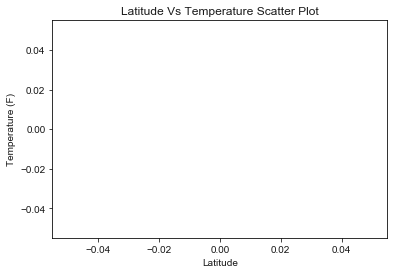

<Figure size 432x288 with 0 Axes>

In [12]:
#Latitude Vs Temperature Scatter Plot
plt.scatter(WeatherPy_df["Latitude"],WeatherPy_df["Temp (F)"],marker ="o")
plt.title("Latitude Vs Temperature Scatter Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
sns.set()
plt.show()

# Save the figure
plt.savefig("Latitude_Vs_Temperature_Scatter_Plot.png")

#### Latitude vs. Humidity Plot

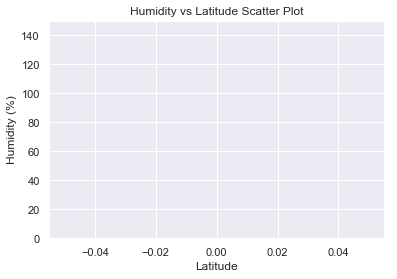

<Figure size 432x288 with 0 Axes>

In [14]:
#Humidity Vs. Latitude Scatter Plot
plt.scatter(WeatherPy_df["Latitude"],WeatherPy_df["Humidity (%)"],marker ="o")
plt.title("Humidity vs Latitude Scatter Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,150)
sns.set()
plt.show()

# Save the figure
plt.savefig("humidity_vs_latitude_scatter_plot.png")

#### Latitude vs. Cloudiness Plot

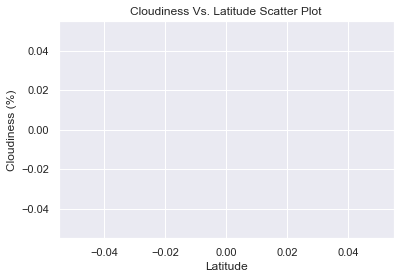

<Figure size 432x288 with 0 Axes>

In [15]:
#Cloudiness Vs. Latitude Scatter Plot
plt.scatter(WeatherPy_df["Latitude"],WeatherPy_df["Cloudiness (%)"],marker ="o")
plt.title("Cloudiness Vs. Latitude Scatter Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
sns.set()
plt.show()

# Save the figure
plt.savefig("Cloudiness_vs_Latitude_Scatter_Plot.png")


#### Latitude vs. Wind Speed Plot

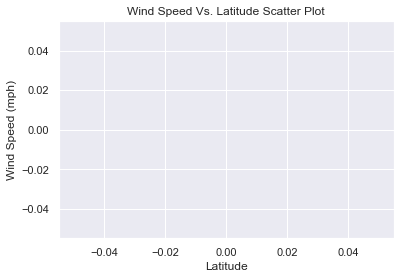

<Figure size 432x288 with 0 Axes>

In [16]:
#Wind Speed Vs. Latitude Scatter Plot
plt.scatter(WeatherPy_df["Latitude"],WeatherPy_df["Wind Speed (mph)"],marker ="o")
plt.title("Wind Speed Vs. Latitude Scatter Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
sns.set()
plt.show()

# Save figure
plt.savefig("Wind_Speed_Vs._Latitude_Scatter Plot.png")

In [ ]:
# Analysis 
#1. As the latitude goes to the east, the temperature goes down 
#2. The further you move from the equator, whether from east or west, the higher the wind speed 
#3. It seems that cloudiness and latitude do not have a coorellation. 